In [2]:
import stockdatalib as sd
from IPython.display import display
from IPython.display import HTML
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def XXXplot_basic_charts():
    if(sd.stock == ""):
        print('Error: Stock Symbol is NOT set.')
        return
    
    stock_title = sd.stock.upper() + ' ' + '(' + company_name + ')' + ' [' + company_sector + ' Sector]'
    price_df = sd.GetStockDataFrame(sd.stock)
    
    # Load the stock fundamental data
    keys, column_map, main_df_org = sd.GetFund_Dict(sd.stock)
    
    # Create a subset of columns in a DataFrame from the stock fundamentals dataset
    cols = ['Revenue','Earnings before Tax','Net Income','Free Cash Flow margin','Gross Profit','Net Profit Margin'] # [ 'Shares', 'Price', 'Revenue', 'Earnings']
    main_df1 = sd.MakeFund_Subset(main_df_org['income-statement'],cols)

    # Create another subset of columns from another fundamentals dataset
    cols = ['Number of Shares','Stock Price']
    main_df2 = sd.MakeFund_Subset(main_df_org['enterprise-value'],cols)

    # Create a 3rd subject of columns from yet another fundamentals dataset
    cols = ['Capital Expenditure','Free Cash Flow']
    main_df3 = sd.MakeFund_Subset(main_df_org['cash-flow-statement'],cols)

    # Create a 4th subject of columns from yet another fundamentals dataset
    cols = ['Free Cash Flow per Share']
    main_df4 = sd.MakeFund_Subset(main_df_org['company-key-metrics'],cols)


    # Merge the 3 dataframes into a single dataframe
    main_df = pd.merge(main_df1,main_df2,on='date')
    main_df = pd.merge(main_df,main_df3,on='date')
    main_df = pd.merge(main_df,main_df4,on='date')
    #dates = pd.DataFrame({'date': main_df_org['cash-flow-statement'].index})
    #main_df['Timestamps​'] = dates
    #main_df = main_df.set_index('date')
    #print(dates)
    #print(price_df['Timestamps'][0])
    #main_df = sd.df_start_after_datetime(main_df, price_df['Timestamps'][0])
    
    # Calculate the moving averages 
    MADays = [40,100,200]
    MA = [{}]
    ma_names = []
    for ma in MADays:
        mean_name = str(ma)+' days MA'
        ma_names.append(mean_name)
        tmp_df = pd.DataFrame({'Timestamps': price_df['Timestamps'].to_list() ,mean_name: price_df['AdjClose'].rolling(window=ma).mean()})
        price_df = pd.merge(price_df, tmp_df, on = 'Timestamps')    

    fig = plt.figure(figsize=(15, 6))

    # ***************************************************
    # Find the full trend line
    x = range(len(price_df['Timestamps']))
    fit = np.polyfit(x, price_df['AdjClose'].astype(float), 1)
    fit_fn = np.poly1d(fit)
    print('5 Years Trend Line Function :'+str(fit_fn))

    trend = []
    for k in x:
        t = fit_fn(k)
        trend.append(t)
    price_df['5 Yr Trend'] = trend
    # ***************************************************

    twoyears_ago = datetime.datetime.today() - datetime.timedelta(days=2 * 365)
    price_df_2y = price_df[price_df['Timestamps'] > twoyears_ago].copy(deep=True)
    # price_df = price_df_2y
    # Find the 2 years trend line
    x = range(len(price_df_2y['Timestamps']))
    fit = np.polyfit(x, price_df_2y['AdjClose'].astype(float), 1)
    fit_fn = np.poly1d(fit)
    print('2 Years Trend Line Function :'+str(fit_fn))

    trend = []
    for k in x:
        t = fit_fn(k)
        trend.append(t)
    price_df_2y['2 Yr Trend'] = trend
    # ***************************************************

    oneyears_ago = datetime.datetime.today() - datetime.timedelta(days=1 * 365)
    price_df_1y = price_df[price_df['Timestamps'] > oneyears_ago].copy(deep=True)
    # Find the 1 year trend line
    x = range(len(price_df_1y['Timestamps']))
    fit = np.polyfit(x, price_df_1y['AdjClose'].astype(float), 1)
    fit_fn = np.poly1d(fit)
    print('1 Year Trend Line Function :'+str(fit_fn))

    trend = []
    for k in x:
        t = fit_fn(k)
        trend.append(t)
    price_df_1y['1 Yr Trend'] = trend
    # ***************************************************

    sixmonth_ago = datetime.datetime.today() - datetime.timedelta(days=0.5 * 365)
    price_df_6m = price_df[price_df['Timestamps'] > sixmonth_ago].copy(deep=True)
    # Find the 6 months trend line
    x = range(len(price_df_6m['Timestamps']))
    fit = np.polyfit(x, price_df_6m['AdjClose'].astype(float), 1)
    fit_fn = np.poly1d(fit)
    print('6 Months Trend Line Function :'+str(fit_fn))

    trend = []
    for k in x:
        t = fit_fn(k)
        trend.append(t)
    price_df_6m['6 Month Trend'] = trend
    # ***************************************************

    ts = pd.to_datetime(str(price_df['Timestamps'].iloc[0]))
    frm = ts.strftime('%Y-%m-%d')
    ts = pd.to_datetime(str(price_df['Timestamps'].iloc[-1]))
    to = ts.strftime('%Y-%m-%d')

    stock_title = stock_title + '\nFrom ' + frm \
                  + ' To ' + to

    ## Create Plot
    fig, axs = plt.subplots(4, figsize=(15, 25), sharex=True, 
                            gridspec_kw={'hspace': 0, 'wspace': 0 , 'height_ratios':[2,1,1,1]})
    fig.suptitle(stock_title, fontsize=30)
    
    y_list = ['Low', 'AdjClose', 'High']
    for ma in ma_names:
        y_list.append(ma)
    y_list.append('5 Yr Trend')    
    
    price_df.plot(ax=axs[0], x='Timestamps', y=y_list,
                  title=stock_title)
    price_df_2y.plot(ax=axs[0], x='Timestamps', y=['2 Yr Trend'])
    price_df_1y.plot(ax=axs[0], x='Timestamps', y=['1 Yr Trend'])
    price_df_6m.plot(ax=axs[0], x='Timestamps', y=['6 Month Trend'], grid=True)
    
    axs[0].set_ylabel('Stock Price')
    
    # earn_df =

    dic = [{}]
    p_over_e_df = [{}]  # pd.DataFrame(columns=['Timestamps','Price/Earning'])

    i = 0
    main_df['EPS'] = sd.MakeFund_Subset(main_df_org['income-statement'], ['EPS'])
    main_df['PE ratio'] = sd.MakeFund_Subset(main_df_org['company-key-metrics'], ['PE ratio'])

    from_date = main_df['EPS'].index[i]

    to_date = main_df['EPS'].index[i + 1]
    for d in price_df['Timestamps']:
        if d > to_date:
            i = i + 1
            if i < len(main_df['EPS']) - 1:
                from_date = main_df['EPS'].index[i]
                to_date = main_df['EPS'].index[i + 1]
                continue
            else:
                break

        elif from_date <= d <= to_date:
            jj = main_df[main_df.index == from_date]['EPS'][0]
            pp = main_df[main_df.index == from_date]['PE ratio'][0]
            ff = main_df[main_df.index == from_date]['Free Cash Flow per Share'][0]            
            rr = main_df[main_df.index == from_date]['Revenue'][0]   
            
            ee = main_df[main_df.index == from_date]['Earnings before Tax'][0]          
            nn = main_df[main_df.index == from_date]['Net Income'][0]          
            cc = main_df[main_df.index == from_date]['Free Cash Flow'][0]          
            gg = main_df[main_df.index == from_date]['Gross Profit'][0]
            
            kk = price_df[price_df['Timestamps'] == d]['AdjClose'].values[0]

            dic.append({'Timestamps': d, 'Calc. P/E': (kk / jj) / 4.0, 'EPS': jj,
                        'P/E': pp, 'FCF/Share': ff, 'Revenue' : rr,
                        'Earnings before Tax' : ee, 'Net Income' : nn,
                        'Free Cash Flow' : cc, 'Gross Profit' : gg})

        else:
            continue

    plots_df = pd.DataFrame(dic).set_index('Timestamps').dropna()

    plots_df.plot(ax=axs[1], y=['EPS'], grid=True)
    plots_df.plot(ax=axs[1], y=['FCF/Share'], grid=True)
    axs[1].set_ylabel('Earning && FCF/Share')
    plots_df.plot(ax=axs[2], y=['P/E'], grid=True)
    plots_df.plot(ax=axs[2], y=['Calc. P/E'], grid=True)        
    axs[2].set_ylabel('Price/Earning (P/E)')
    
    plots_df.plot(ax=axs[3],y=['Revenue'])
    plots_df.plot(ax=axs[3],y=['Earnings before Tax'])
    plots_df.plot(ax=axs[3],y=['Net Income'])
    plots_df.plot(ax=axs[3],y=['Free Cash Flow'])
    plots_df.plot(ax=axs[3],y=['Gross Profit'],grid=True)

    axs[3].set_ylabel('Growth')
    
    for ax in axs:
        ax.label_outer()
        ax.minorticks_on()
        ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

5 Years Trend Line Function : 
1.412 x + 278.2
2 Years Trend Line Function : 
0.5566 x + 1625
1 Year Trend Line Function : 
0.3317 x + 1802
6 Months Trend Line Function : 
2.252 x + 1701


<Figure size 1080x432 with 0 Axes>

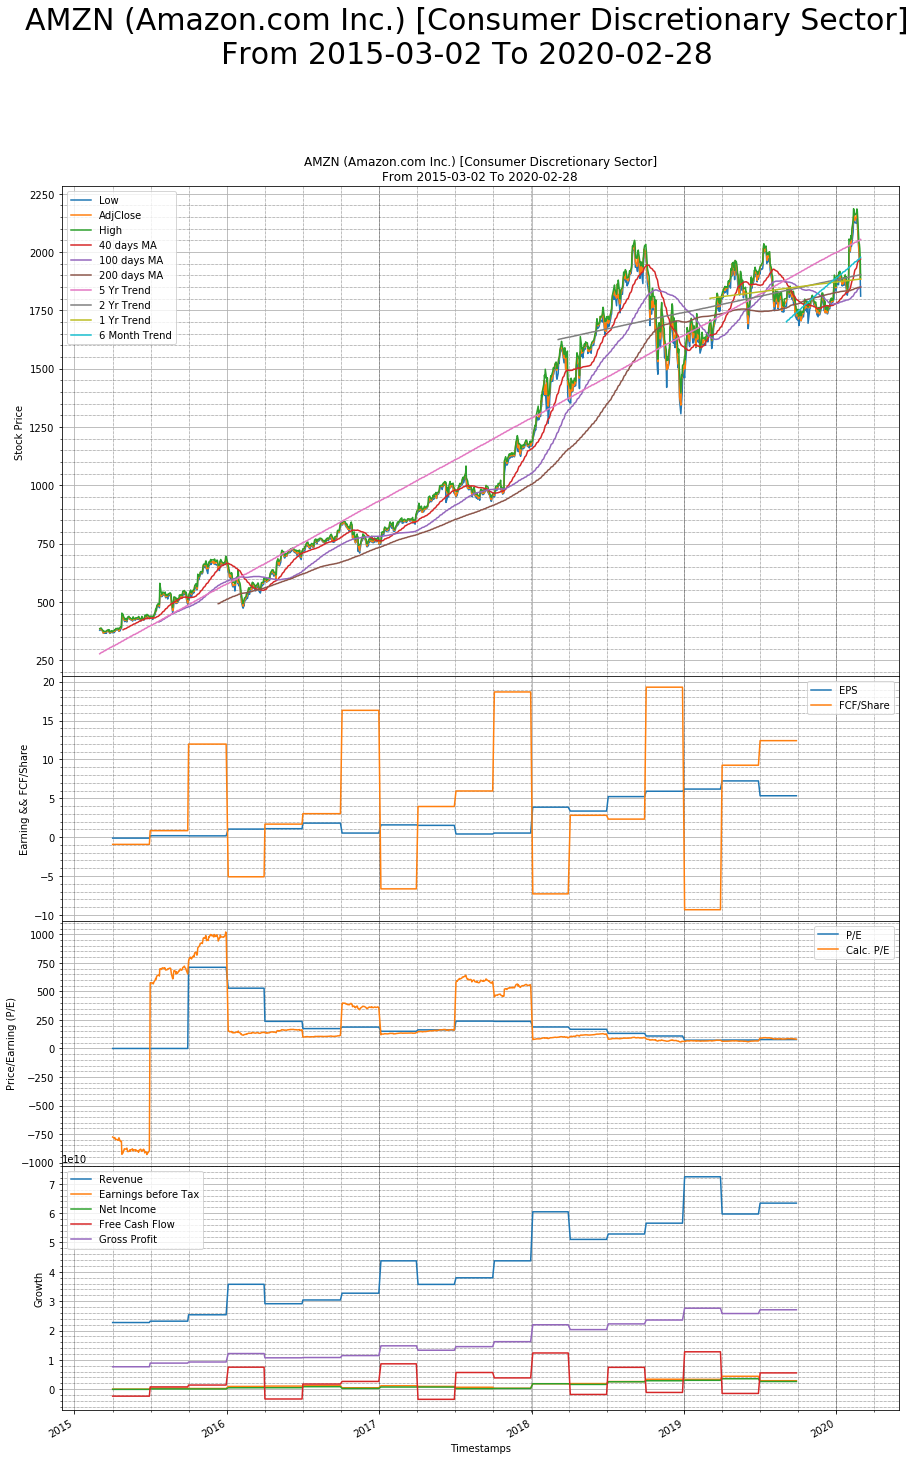

In [7]:
# Set the data directory and the stock name
sd.set_data_directory('./data/')
sd.set_stock('amzn')

# Load S&P Stock list
stock_count, stock_fields, sp_df = sd.GetSP500_List()

# Get stock company information
stock_info = sp_df[sp_df.Symbol == sd.stock.upper()]
company_name = stock_info['Name'].iloc[0]
company_sector = stock_info['Sector'].iloc[0]

# Plot stock basic charts
sd.plot_basic_charts()

In [8]:

# Load stock End of Day prices file
price_df = sd.GetStockDataFrame(sd.stock)
# Index the data frame by 'Timestamps' column
price_df.set_index('Timestamps',inplace=True)

# Load the stock fundamental data
keys, column_map, main_df_org = sd.GetFund_Dict(sd.stock)

# Search for a key word in the data column names
f,s = sd.where_is_column('Revenue')
#display(f.to_html())


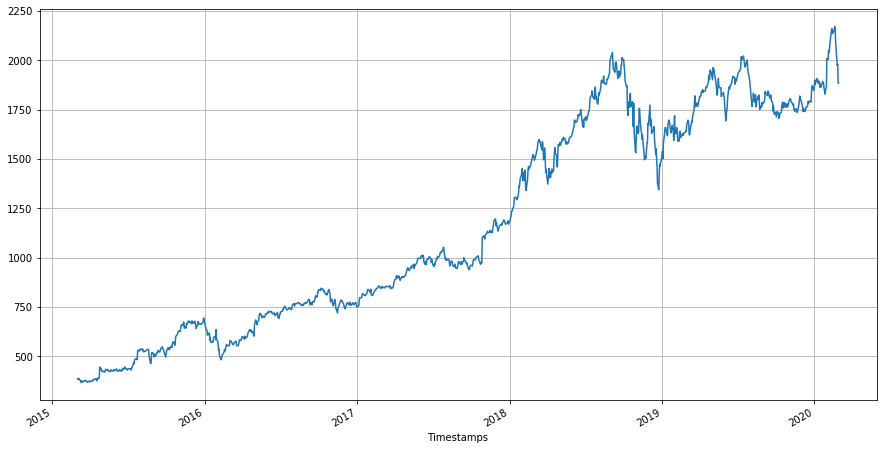

In [9]:
# Limit the stock prices data in the dates range
#price_df = sd.df_start_after_datetime(price_df, '2015-01-01')

# Plot the prices chart
price_df['AdjClose'].plot(figsize=(15,8)).grid()

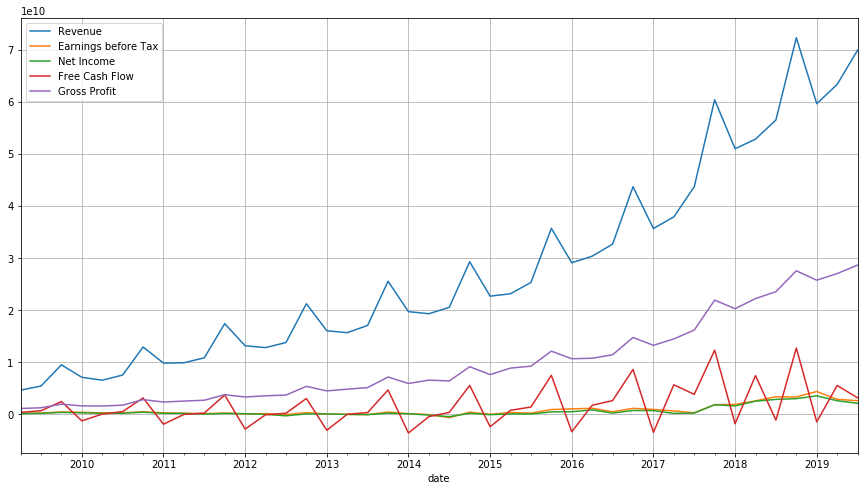

In [10]:
# Create a subset of columns in a DataFrame from the stock fundamentals dataset
cols = ['Revenue','Earnings before Tax','Net Income','Free Cash Flow margin','Gross Profit','Net Profit Margin'] # [ 'Shares', 'Price', 'Revenue', 'Earnings']
main_df1 = sd.MakeFund_Subset(main_df_org['income-statement'],cols)

# Create another subset of columns from another fundamentals dataset
cols = ['Number of Shares','Stock Price']
main_df2 = sd.MakeFund_Subset(main_df_org['enterprise-value'],cols)

# Create a 3rd subject of columns from yet another fundamentals dataset
cols = ['Capital Expenditure','Free Cash Flow']
main_df3 = sd.MakeFund_Subset(main_df_org['cash-flow-statement'],cols)

# Create a 4th subject of columns from yet another fundamentals dataset
cols = ['Free Cash Flow per Share']
main_df4 = sd.MakeFund_Subset(main_df_org['company-key-metrics'],cols)


# Merge the 3 dataframes into a single dataframe
main_df = pd.merge(main_df1,main_df2,on='date')
main_df = pd.merge(main_df,main_df3,on='date')
main_df = pd.merge(main_df,main_df4,on='date')

main_df.plot(y=['Revenue','Earnings before Tax','Net Income','Free Cash Flow','Gross Profit'],figsize=(15,8)).grid()


In [11]:
# Plot price chart with trend lines, EPS, and PE ratios
plot_stock_charts()

NameError: name 'plot_stock_charts' is not defined

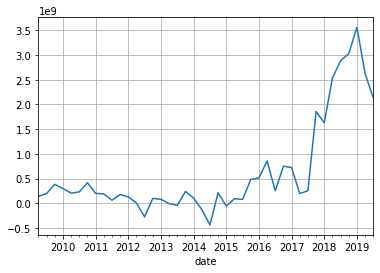

In [12]:

main_df['Net Income'].plot().grid()

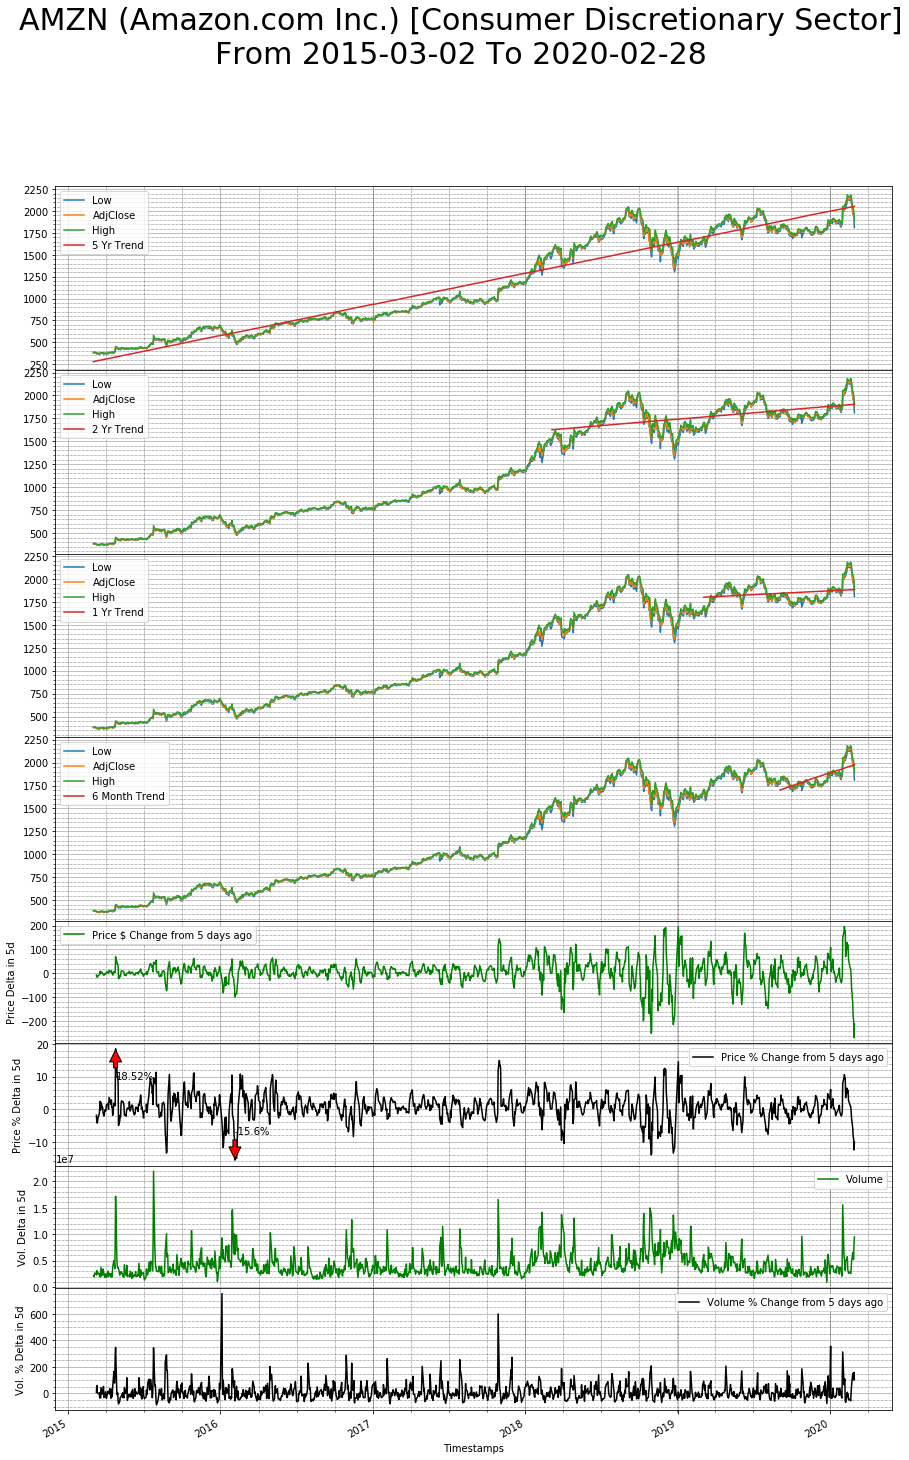

In [13]:
import time
price_data_df = price_df.copy(deep=True)
price_data_df.dropna()
dif_period = 5

# Load stock End of Day prices file
price_data_df = sd.GetStockDataFrame(sd.stock)

price_change = 'Price $ Change from '+str(dif_period)+' days ago'
price_data_df[price_change] = price_data_df['AdjClose'].diff(dif_period).dropna().astype(float)

price_change_percent = 'Price % Change from '+str(dif_period)+' days ago'
price_data_df[price_change_percent] = price_data_df['AdjClose'].pct_change(dif_period).dropna().astype(float) * 100

volume_change_percent = 'Volume % Change from '+str(dif_period)+' days ago'
price_data_df[volume_change_percent] = price_data_df['Volume'].pct_change(dif_period).dropna().astype(float) * 100


# ***************************************************
# Find the full trend line
x = range(len(price_data_df['Timestamps']))
fit = np.polyfit(x, price_data_df['AdjClose'].astype(float), 1)
fit_fn = np.poly1d(fit)
trend = []
for k in x:
    t = fit_fn(k)
    trend.append(t)
price_data_df['5 Yr Trend'] = trend
# ***************************************************

twoyears_ago = datetime.datetime.today() - datetime.timedelta(days=2 * 365)
price_df_2y = price_data_df[price_data_df['Timestamps'] > twoyears_ago].copy(deep=True)
# Find the 2 years trend line
x = range(len(price_df_2y['Timestamps']))
fit = np.polyfit(x, price_df_2y['AdjClose'].astype(float), 1)
fit_fn = np.poly1d(fit)
trend = []
for k in x:
    t = fit_fn(k)
    trend.append(t)
price_df_2y['2 Yr Trend'] = trend
# ***************************************************

oneyears_ago = datetime.datetime.today() - datetime.timedelta(days=1 * 365)
price_df_1y = price_data_df[price_data_df['Timestamps'] > oneyears_ago].copy(deep=True)
# Find the 1 year trend line
x = range(len(price_df_1y['Timestamps']))
fit = np.polyfit(x, price_df_1y['AdjClose'].astype(float), 1)
fit_fn = np.poly1d(fit)
trend = []
for k in x:
    t = fit_fn(k)
    trend.append(t)
price_df_1y['1 Yr Trend'] = trend
# ***************************************************

sixmonth_ago = datetime.datetime.today() - datetime.timedelta(days=0.5 * 365)
price_df_6m = price_data_df[price_data_df['Timestamps'] > sixmonth_ago].copy(deep=True)
# Find the 6 months trend line
x = range(len(price_df_6m['Timestamps']))
fit = np.polyfit(x, price_df_6m['AdjClose'].astype(float), 1)
fit_fn = np.poly1d(fit)
trend = []
for k in x:
    t = fit_fn(k)
    trend.append(t)
price_df_6m['6 Month Trend'] = trend
# ***************************************************

stock_title = sd.stock.upper()+ ' ' +'('+company_name+')'+' ['+ company_sector+' Sector]'
ts = pd.to_datetime(str(price_data_df['Timestamps'].iloc[0])) 
frm = ts.strftime('%Y-%m-%d')
ts = pd.to_datetime(str(price_data_df['Timestamps'].iloc[-1])) 
to = ts.strftime('%Y-%m-%d')

stock_title = stock_title + '\nFrom '+ frm \
                        + ' To ' + to

price_data_df['2 Yr Trend'] = price_df_2y['2 Yr Trend'].copy(deep=True)
price_data_df['1 Yr Trend'] = price_df_1y['1 Yr Trend'].copy(deep=True)
price_data_df['6 Month Trend'] = price_df_6m['6 Month Trend'].copy(deep=True)

price_data_df.set_index('Timestamps', inplace=True)

#, squeeze=True, gridspec_kw = {'height_ratios':[1,2,5,2,3]}
fig, axs = plt.subplots(8,figsize=(15,25), sharex = True , gridspec_kw={'hspace': 0, 'wspace': 0, 'height_ratios':[3,3,3,3,2,2,2,2]})
fig.suptitle(stock_title, fontsize=30) 

price_data_df.plot(ax=axs[0],y=['Low','AdjClose','High','5 Yr Trend'], grid=True)
price_data_df.plot(ax=axs[1],y=['Low','AdjClose','High','2 Yr Trend'], grid=True)
price_data_df.plot(ax=axs[2],y=['Low','AdjClose','High','1 Yr Trend'], grid=True)
price_data_df.plot(ax=axs[3],y=['Low','AdjClose','High','6 Month Trend'], grid=True)

price_data_df.plot(ax=axs[4],y=[price_change], grid=True, color='green')
axs[4].set_ylabel('Price Delta in '+str(dif_period)+'d')

price_data_df.plot(ax=axs[5],y=[price_change_percent], grid=True, color='black')
axs[5].set_ylabel('Price % Delta in '+str(dif_period)+'d')

price_data_df.plot(ax=axs[6],y=['Volume'], grid=True, color='green')
axs[6].set_ylabel('Vol. Delta in '+str(dif_period)+'d')

price_data_df.plot(ax=axs[7],y=[volume_change_percent], grid=True, color='black')
axs[7].set_ylabel('Vol. % Delta in '+str(dif_period)+'d')

# Find Max and Min for price and volume changes and mark price max and min on chart
max_price_change = price_data_df[ np.round(price_data_df[price_change_percent],2) 
                                 == np.round(price_data_df[price_change_percent].max(),2)]
min_price_change = price_data_df[ np.round(price_data_df[price_change_percent],2) 
                                 == np.round(price_data_df[price_change_percent].min(),2)]

max_vol_change = price_data_df[ price_data_df[volume_change_percent] 
                               == price_data_df[volume_change_percent].max()]
min_vol_change = price_data_df[ price_data_df[volume_change_percent] 
                               == price_data_df[volume_change_percent].min()]


# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ts = pd.to_datetime(str(max_price_change.index.values[0])) 
mxp = ts.strftime('%Y-%m-%d')

ts = pd.to_datetime(str(min_price_change.index.values[0])) 
mnp = ts.strftime('%Y-%m-%d')

#print('The biggest +ve change in % price happend on', mxp+'.', 'Price changed by',
#      str(np.round(max_price_change[price_change_percent].values[0],2))+'%')    
#print('The biggest -ve change in % price happend on', mnp+'.', 'Price changed by',
#      str(np.round(min_price_change[price_change_percent].values[0],2))+'%')

ts = pd.to_datetime(str(max_vol_change.index.values[0])) 
mxv = ts.strftime('%Y-%m-%d')

# Annotate charts with max and min
axs[5].annotate(str(np.round(max_price_change[price_change_percent].values[0],2))+'%', 
                xy=(max_price_change.index.values[0],                                   
                max_price_change[price_change_percent].values[0]), 
                xytext=(max_price_change.index.values[0], 
                max_price_change[price_change_percent].values[0] * 0.5),
                arrowprops=dict(facecolor='red', shrink=0.05),
                )


ts = pd.to_datetime(str(min_vol_change.index.values[0])) 
mnv = ts.strftime('%Y-%m-%d')
axs[5].annotate(str(np.round(min_price_change[price_change_percent].values[0],2))+'%', 
                xy=(min_price_change.index.values[0],                                   
                min_price_change[price_change_percent].values[0]), 
                xytext=(min_price_change.index.values[0], 
                min_price_change[price_change_percent].values[0] * 0.5),
                arrowprops=dict(facecolor='red', shrink=0.05),
                )

#print('The biggest +ve change in % volumne happend on', mxv+'.', 'Volume changed by', 
#      str(np.round(max_vol_change[volume_change_percent].values[0],2))+'%')
#print('The biggest -ve change in % volumne happend on', mnv+'.', 'Volume changed by', 
#      str(np.round(min_vol_change[volume_change_percent].values[0],2))+'%')

maxtable_df = pd.DataFrame({'Change Type':['Max % Rise','Max % Drop','Max % Rise','Max % Drop'],
                            'Date':[mxp,mnp,mxv,mnv], 'Price':[str(np.round(max_price_change[price_change_percent].values[0],2))+'%',
                                                       str(np.round(min_price_change[price_change_percent].values[0],2))+'%','--','--'], 
                            'Volume':['--','--', str(np.round(max_vol_change[volume_change_percent].values[0],2))+'%',
                                      str(np.round(min_vol_change[volume_change_percent].values[0],2))+'%']})
maxtable_df = maxtable_df.set_index('Change Type')

In [14]:
maxtable_df

,Date,Price,Volume
Change Type,,,
Max % Rise,2015-04-24,18.52%,--
Max % Drop,2016-02-04,-15.6%,--
Max % Rise,2016-01-04,--,753.6%
Max % Drop,2015-07-31,--,-86.19%


In [15]:
price_data_df.describe()

,Open,High,Low,AdjClose,Volume,Price $ Change from 5 days ago,Price % Change from 5 days ago,Volume % Change from 5 days ago,5 Yr Trend,2 Yr Trend,1 Yr Trend,6 Month Trend
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1254.000000,1254.000000,1254.000000,1259.000000,501.000000,251.000000,124.000000
mean,1166.801247,1177.253670,1154.392987,1166.292105,4.189439e+06,6.227081,0.726431,12.611094,1166.292105,1764.246388,1843.337768,1839.511933
std,534.404111,539.160596,528.458748,533.876934,2.193930e+06,50.126981,3.939697,62.410407,513.326211,80.575197,24.084508,80.940513
min,367.109985,371.399994,365.649994,366.369995,8.813000e+05,-268.800049,-15.596123,-86.190402,278.243839,1625.103413,1801.870896,1701.006808
25%,711.089996,716.799988,705.410004,710.629974,2.749950e+06,-12.700012,-1.282427,-25.126342,722.267972,1694.674900,1822.604332,1770.259371
50%,993.530029,998.650024,983.500000,990.989990,3.588200e+06,6.795029,0.808748,1.040876,1166.292105,1764.246388,1843.337768,1839.511933
75%,1726.505005,1744.684998,1709.044983,1729.890015,4.892100e+06,28.522522,2.770587,33.291105,1610.316238,1833.817876,1864.071204,1908.764496
max,2173.070068,2185.949951,2161.120117,2170.219971,2.190940e+07,196.419922,18.516351,753.601540,2054.340372,1903.389363,1884.804641,1978.017058


In [16]:
f,s = sd.where_is_column('cash flow')
f

,column_name,DataFrame
0,Free Cash Flow margin,income-statement
1,Operating Cash Flow,cash-flow-statement
2,Investing Cash flow,cash-flow-statement
3,Financing Cash Flow,cash-flow-statement
4,Net cash flow / Change in cash,cash-flow-statement
5,Free Cash Flow,cash-flow-statement
6,Operating Cash Flow per Share,company-key-metrics
7,Free Cash Flow per Share,company-key-metrics
8,EV to Operating cash flow,company-key-metrics
9,EV to Free cash flow,company-key-metrics
